
######Karim ELDakroury


In [1]:
# usefull imports
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import pandas as pd
import warnings

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('GermanData.csv', header = None, names = list(range(1, 22)
))
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [ ]:
# Splitting the data 
label_features = [1, 3, 6, 7, 12, 17]
one_hot_features = [4, 9, 10, 14, 15, 19, 20]
roll_features = [1, 6, 12]
#x = df.drop(21, axis = 1) 

numerical_features = [feature for feature, dtype in df.dtypes.items() if dtype == np.int and feature != 21]
categorical_features = [feature for feature, dtype in df.dtypes.items() if dtype == np.object]


In [ ]:
# one-hot-encode categorical features
encoder = OneHotEncoder(sparse=False)

new_encoded_fet = encoder.fit_transform(df[one_hot_features])
new_encoded_fet = pd.DataFrame(new_encoded_fet, columns = list(range(22, 22 + new_encoded_fet.shape[1])))

In [ ]:
for feature in label_features:
  df[feature] = LabelEncoder().fit_transform(df[feature])

for feature in roll_features:
  mx = np.max(df[feature])
  for i in range(df.shape[0]):
    df[feature][i] = df[feature][i] + 1 if df[feature][i] < mx else 0
for feature in categorical_features:
  df.drop(feature, axis = 1, inplace=True)

df = pd.concat([df, new_encoded_fet], axis = 1)
df

,2,5,8,11,13,16,18,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,6,1169,4,4,67,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,48,5951,2,2,22,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,42,7882,2,4,45,1,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
996,30,3857,4,4,40,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
997,12,804,4,4,38,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
998,45,1845,4,4,23,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


I choose to scale the data between 0 and 1 to make the values smaller in the case of calculating big values, so the model will not oveflow 

In [ ]:
#Scaling the Data
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,2,5,8,11,13,16,18,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
996,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
997,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
998,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


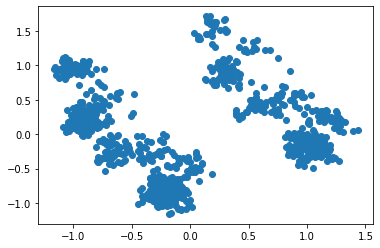

In [ ]:
X = df.drop(21, axis = 1)
y = df[21]

pca = PCA(n_components = 2)

X_PCA = pca.fit_transform(X)

y1 = [i for i in range(y.shape[0]) if y[i] ]

plt.plot(X_PCA[y1, 0], X_PCA[y1, 1], 'o')
plt.show()

In [ ]:
# Checking correlation
df.corr()

,2,5,8,11,13,16,18,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
2,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927,-0.109999,0.144939,0.104516,-0.062804,-0.044319,-0.037212,-0.022549,0.003750,-0.072151,0.164113,0.006415,-0.081432,0.121889,-0.084418,0.009993,0.029698,-0.039594,0.035851,0.065688,-0.067602,-0.064417,-0.075169,0.189117,-0.164718,0.164718,0.138196,-0.138196
5,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739,-0.040793,0.252101,0.192893,-0.034037,-0.173203,-0.069268,-0.028875,-0.007388,-0.069764,0.103016,0.033619,-0.093482,0.152458,-0.138289,-0.004116,0.079076,-0.065237,0.039474,0.024262,-0.048292,-0.024611,-0.117497,0.201643,-0.276995,0.276995,0.050050,-0.050050
8,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404,-0.045801,-0.094797,-0.030193,-0.062979,0.138552,0.019088,0.040204,0.042471,0.040180,-0.025326,-0.097047,-0.086302,0.118233,0.007686,0.013823,-0.013048,-0.006429,-0.016150,0.056071,-0.016139,-0.091373,0.049922,0.040098,-0.014413,0.014413,0.090024,-0.090024
11,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967,0.019848,0.107257,0.040460,-0.006934,-0.090043,-0.017816,0.027253,0.040552,0.013390,-0.048899,-0.038473,0.013818,0.063639,-0.102684,0.020553,0.001623,-0.028334,0.014530,-0.054460,0.016704,0.167285,-0.297547,0.227044,-0.095359,0.095359,0.054097,-0.054097
13,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127,0.075044,0.050858,0.042365,-0.127657,-0.046401,-0.012562,0.039567,0.068483,-0.007370,-0.001772,0.062430,-0.161694,0.207434,-0.145529,0.030822,-0.018357,-0.023923,0.046552,-0.011080,-0.035362,-0.212620,0.006553,0.253058,-0.145259,0.145259,0.006151,-0.006151
16,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732,0.035845,-0.005248,0.017752,-0.070478,-0.030706,-0.061782,0.071390,-0.010728,-0.012159,0.084980,-0.026622,-0.094260,0.118198,-0.032623,0.022966,-0.006001,-0.024682,0.042190,0.023496,-0.050290,-0.058070,0.041386,0.011406,-0.065553,0.065553,0.009717,-0.009717
18,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015,0.102663,0.054862,0.003553,-0.086515,-0.082464,-0.047201,0.029952,0.041204,0.017701,-0.000327,-0.060222,-0.203431,0.283483,-0.117209,-0.005566,-0.032817,0.036589,0.075519,0.009335,-0.072220,-0.063033,-0.027579,0.118047,0.014753,-0.014753,-0.077071,0.077071
21,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000,0.096900,-0.099791,0.028058,0.020971,-0.106922,0.008016,0.020828,0.070088,-0.039281,0.036129,0.050063,0.075493,-0.080677,-0.019630,-0.000751,0.062728,-0.055039,0.096510,0.050523,-0.113285,0.092785,-0.134589,0.081556,0.036466,-0.036466,0.082079,-0.082079
22,-0.109999,-0.040793,-0.045801,0.019848,0.075044,0.035845,0.102663,0.096900,1.000000,-0.187291,-0.060912,-0.259831,-0.344672,-0.060912,-0.082896,-0.126799,-0.052672,-0.181149,-0.018424,-0.012972,0.027374,-0.012487,0.006197,0.004836,-0.012426,0.010064,-0.066940,0.027462,-0.011620,-0.009618,0.028370,0.036275,-0.036275,-0.154436,0.154436
23,0.144939,0.252101,-0.094797,0.107257,0.050858,-0.005248,0.054862,-0.099791,-0.187291,1.000000,-0.037345,-0.159301,-0.211317,-0.037345,-0.050823,-0.077740,-0.032293,-0.111062,-0.032455,-0.056410,0.089610,-0.039567,0.063197,-0.053474,-0.034910,-0.012525,0.002472,0.009791,0.039160,-0.141375,0.157680,-0.136693,0.136693,0.031564,-0.031564


The correlation is high between features 1169 and 1169 and this could affect the model as it will be hard to change one of them without changing the another 

In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7, test_size=0.3, random_state = 1346759)


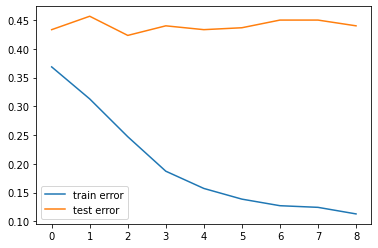

In [ ]:
# training model
clf = LogisticRegression(class_weight = 'balanced')
pca_t = PCA(n_components = 10)
train_error= list()
test_error = list()

for degree in range(1, 10):
  poly = PolynomialFeatures(degree)
  model = make_pipeline(pca_t, poly, clf)
  model = model.fit(x_train, y_train)

  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)

  train_error.append(
        mean_squared_error(y_train, train_pred))
        
  test_error.append(
        mean_squared_error(y_test, test_pred))
        

plt.plot(train_error, label = 'train error')
plt.plot(test_error, label = 'test error')
plt.legend()
plt.show()

the model which performs the best in terms of biasvariance is the 1st one, and the model starts overfitting after the 3th degree.



In [ ]:
# Optimization
warnings.filterwarnings('ignore')
optimal_degree = 1

pipe = Pipeline(
  [
    ('pca', PCA(n_components = 10)),
    ('poly', PolynomialFeatures(optimal_degree)),
    ('logistic', LogisticRegression(class_weight = 'balanced'))
  ]
)

hyperparameters = {
  'logistic__penalty': ['l1', 'l2'],
  'logistic__solver': ['liblinear', 'lbfgs'],
  'logistic__C': np.logspace(-4, 4, 20)
}

grid_model = GridSearchCV(pipe, hyperparameters, verbose = 3, scoring = ['accuracy', 'precision'], refit = 'accuracy')

grid_model.fit(x_train, y_train)
y_pred = grid_model.predict(x_test)
print("Best parameters found:")
print(grid_model.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblinear 
[CV]  logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblinear, accuracy=0.700, precision=0.700, total=   0.0s
[CV] logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblinear 
[CV]  logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblinear, accuracy=0.700, precision=0.700, total=   0.0s
[CV] logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblinear 
[CV]  logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblinear, accuracy=0.700, precision=0.700, total=   0.0s
[CV] logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblinear 
[CV]  logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblinear, accuracy=0.700, precision=0.700, total=   0.0s
[CV] logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblinear 
[CV]  logistic__C=0.0001, logistic__penalty=l1, logistic__solver=liblin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  logistic__C=0.0001, logistic__penalty=l1, logistic__solver=lbfgs, accuracy=nan, precision=nan, total=   0.0s
[CV] logistic__C=0.0001, logistic__penalty=l1, logistic__solver=lbfgs 
[CV]  logistic__C=0.0001, logistic__penalty=l1, logistic__solver=lbfgs, accuracy=nan, precision=nan, total=   0.0s
[CV] logistic__C=0.0001, logistic__penalty=l1, logistic__solver=lbfgs 
[CV]  logistic__C=0.0001, logistic__penalty=l1, logistic__solver=lbfgs, accuracy=nan, precision=nan, total=   0.0s
[CV] logistic__C=0.0001, logistic__penalty=l1, logistic__solver=lbfgs 
[CV]  logistic__C=0.0001, logistic__penalty=l1, logistic__solver=lbfgs, accuracy=nan, precision=nan, total=   0.0s
[CV] logistic__C=0.0001, logistic__penalty=l2, logistic__solver=liblinear 
[CV]  logistic__C=0.0001, logistic__penalty=l2, logistic__solver=liblinear, accuracy=0.557, precision=0.731, total=   0.0s
[CV] logistic__C=0.0001, logistic__penalty=l2, logistic__solver=liblinear 
[CV]  logistic__C=0.0001, logistic__penalty=l2, logist

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    9.9s finished
